In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
# importing dataframe
data = pd.read_csv("cleaned_data.csv")
data.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,neighbourhood_Woodlands,neighbourhood_Yishun,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,COZICOMFORT LONG TERM STAY ROOM 2,Francesca,North Region,Woodlands,Private room,83,180,1,0.01,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Pleasant Room along Bukit Timah,Sujatha,Central Region,Bukit Timah,Private room,81,90,18,0.28,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,COZICOMFORT,Francesca,North Region,Woodlands,Private room,69,6,20,0.20,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Ensuite Room (Room 1 & 2) near EXPO,Belinda,East Region,Tampines,Private room,206,1,14,0.15,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,B&B Room 1 near Airport & EXPO,Belinda,East Region,Tampines,Private room,94,1,22,0.22,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
#Checking no. of rows in dataset to find out the size of data we are working with
data.shape

(7905, 61)

Categorising room type according to neighborhood_group

In [4]:
#Total sum of each respective room_type
data['room_type'].value_counts()

Entire home/apt    4132
Private room       3379
Shared room         394
Name: room_type, dtype: int64

In [5]:
# we shall use groupby to check which room type matches with which neigbourhood_group to atleast know 
# we first convert them both to category variables so they can be correlated
data= data.astype({'room_type': 'category', 'neighbourhood_group': 'category' })

In [6]:
#Total sum of each room type with its respective neighbourhood_group
data.groupby(['room_type', 'neighbourhood_group']).size()

room_type        neighbourhood_group
Entire home/apt  Central Region         3738
                 East Region             131
                 North Region             53
                 North-East Region        64
                 West Region             146
Private room     Central Region         2221
                 East Region             366
                 North Region            142
                 North-East Region       272
                 West Region             378
Shared room      Central Region          348
                 East Region              11
                 North Region              9
                 North-East Region        10
                 West Region              16
dtype: int64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

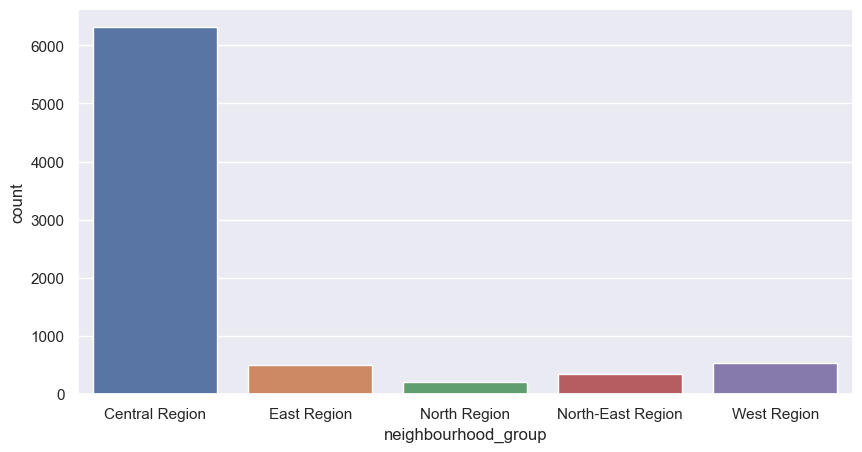

In [7]:
#Plot number of rental housing of each nieghbourhood_group
plt.figure(figsize=(10,5))
sb.countplot(data=data,x=data['neighbourhood_group'])

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

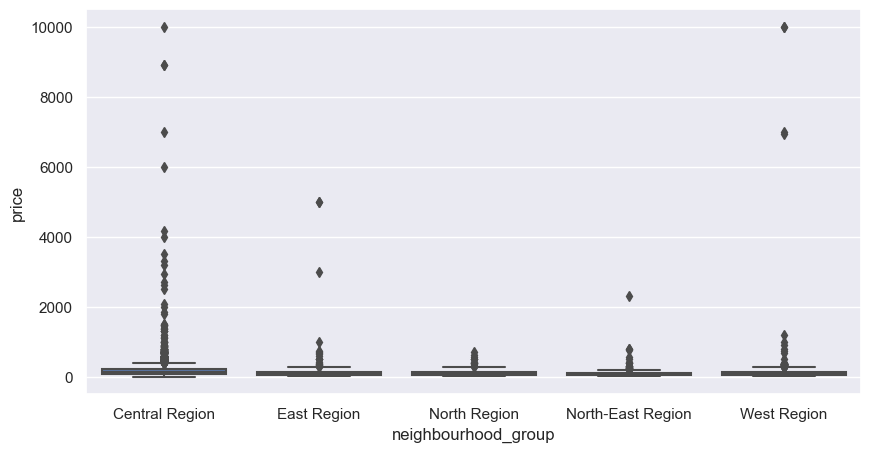

In [8]:
#Plot price of neighbourhood_group
plt.figure(figsize=(10,5))
sb.boxplot(data=data,x=data['neighbourhood_group'],y=data['price'])

<AxesSubplot:xlabel='room_type', ylabel='price'>

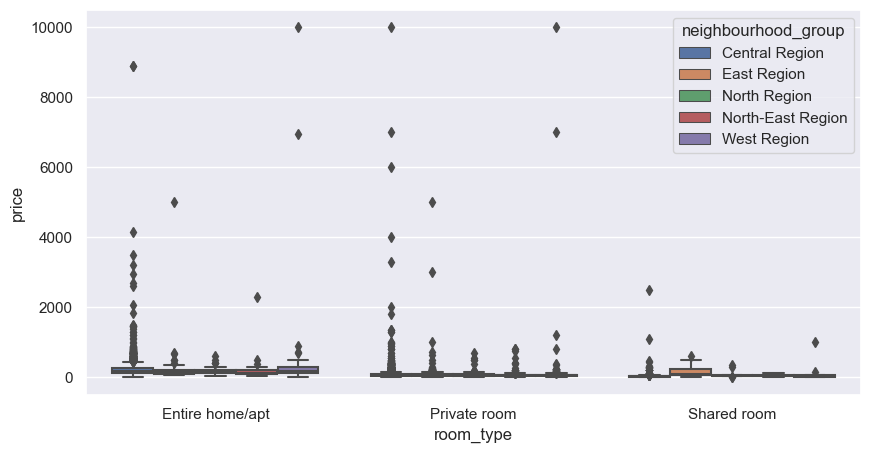

In [9]:
#Plot price based on each room type with its neighbourhodd_groups
plt.figure(figsize=(10,5))
sb.boxplot(data=data,x=data['room_type'],y=data['price'],hue=data['neighbourhood_group'])

In [10]:
#Total sum of number_of_reviews
data.value_counts('number_of_reviews')

number_of_reviews
0      2757
1      1084
2       592
3       373
4       257
       ... 
191       1
192       1
193       1
195       1
323       1
Length: 208, dtype: int64

In [11]:
#Correlation of each neighbourhood_group
one_hot_neighbourhood_group = pd.get_dummies(data['neighbourhood_group'])

corr_matrix = one_hot_neighbourhood_group.corrwith(data['price'])
print('Correlation with price')
print(corr_matrix)

Correlation with price
Central Region       0.042556
East Region         -0.020632
North Region        -0.027993
North-East Region   -0.043679
West Region          0.005325
dtype: float64


In [27]:
#Correlation of each neighbourhood
one_hot_neighbourhood = pd.get_dummies(data['neighbourhood'])

corr_matrix = one_hot_neighbourhood.corrwith(data['price'])
print('Correlation with price')
print(corr_matrix)

Correlation with price
Ang Mo Kio                -0.016640
Bedok                     -0.006970
Bishan                    -0.001822
Bukit Batok                0.009873
Bukit Merah               -0.013043
Bukit Panjang              0.037883
Bukit Timah               -0.005845
Central Water Catchment    0.003008
Choa Chu Kang             -0.020017
Clementi                   0.000478
Downtown Core              0.025398
Geylang                   -0.008569
Hougang                   -0.015630
Jurong East                0.005586
Jurong West               -0.032313
Kallang                   -0.003578
Lim Chu Kang              -0.003448
Mandai                    -0.006451
Marina South               0.008257
Marine Parade             -0.010258
Museum                     0.017663
Newton                     0.007513
Novena                     0.006473
Orchard                    0.047353
Outram                    -0.017393
Pasir Ris                 -0.020581
Punggol                   -0.018163
Queen

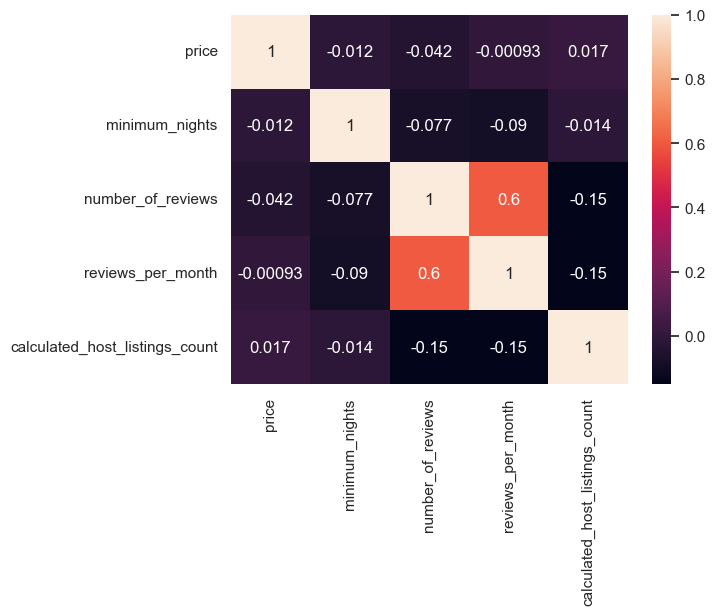

In [13]:
#Correlation of other remaining variables
corr_matrix = pd.DataFrame(data[["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count"]]).corr()
sb.heatmap(corr_matrix, annot=True)
plt.show()

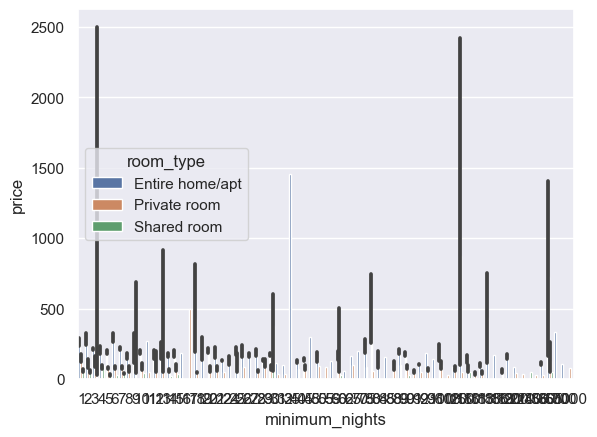

<Figure size 1500x2000 with 0 Axes>

In [14]:
sb.barplot(x="minimum_nights", y="price",hue='room_type' ,data=data)
fig = plt.figure(figsize = (15,20))

<Figure size 1000x500 with 0 Axes>

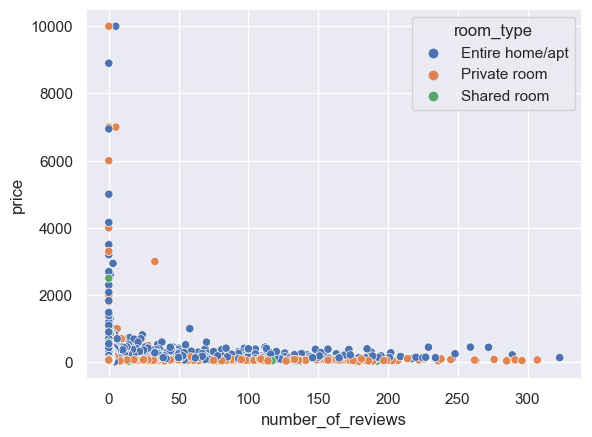

<Figure size 1000x500 with 0 Axes>

In [15]:
#Price plot based on room_type
sb.scatterplot(x="number_of_reviews", y="price",hue='room_type' , data=data)
plt.figure(figsize=(10,5))

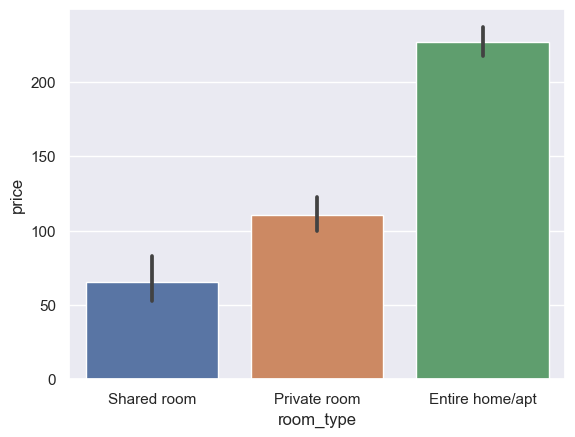

In [16]:
#room_type - price
result = data.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sb.barplot(x='room_type', y="price", data=data, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

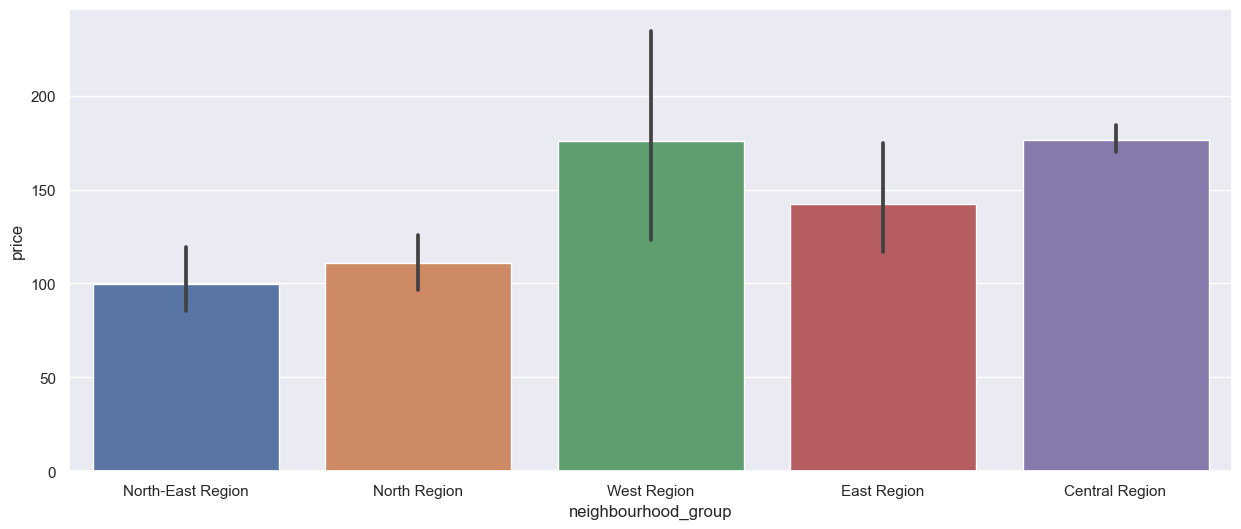

In [17]:
#neighbourhood_group - price
plt.figure(figsize=(15,6))
result = data.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sb.barplot(x='neighbourhood_group', y="price", data=data, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

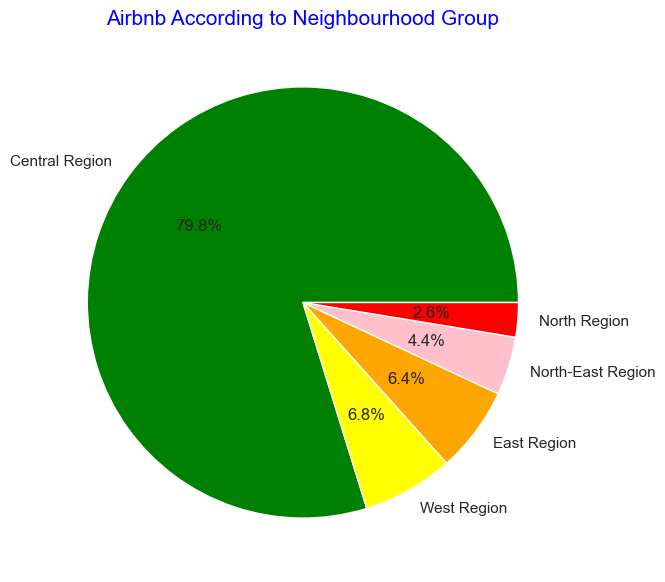

In [18]:
#AirBNB according to Neighborhood Group
labels = data.neighbourhood_group.value_counts().index
colors = ['green','yellow','orange','pink','red']
explode = [0,0,0,0,0]
sizes = data.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Airbnb According to Neighbourhood Group',color = 'blue',fontsize = 15)
plt.show()

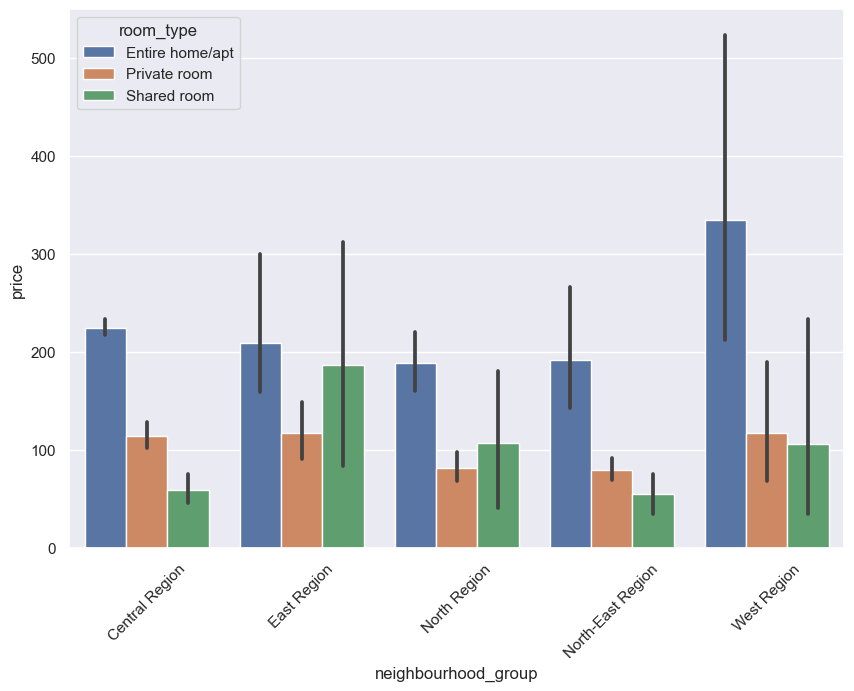

In [19]:
#Plotting bargraph of each different room_type in each region
plt.figure(figsize=(10,7))
sb.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = data)
plt.xticks(rotation=45)
plt.show()


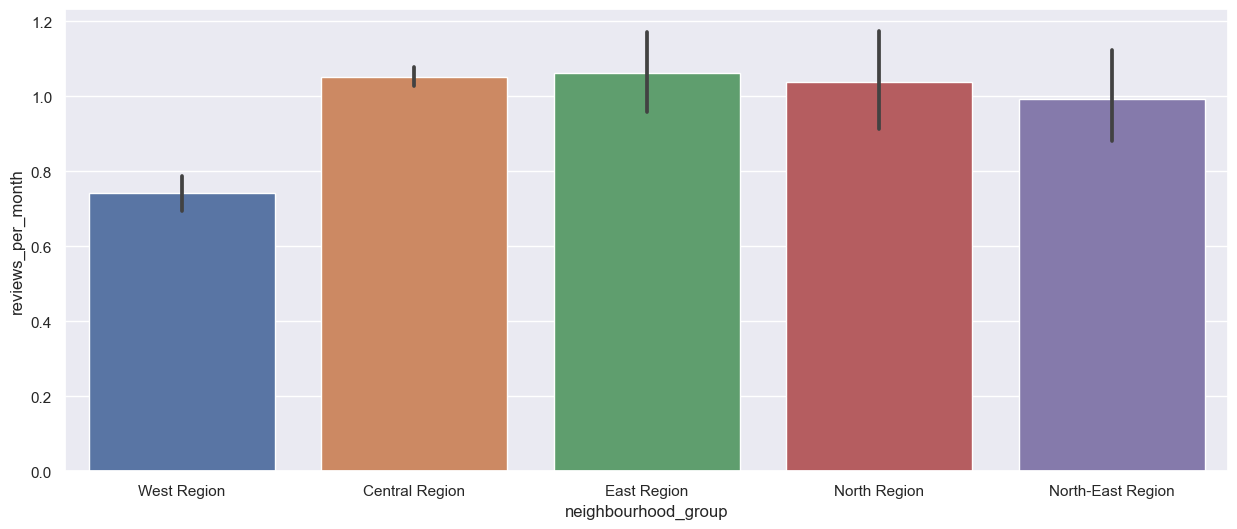

In [20]:
#neighbourhood_group - reviews_per_month
plt.figure(figsize=(15,6))
result = data.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sb.barplot(x='neighbourhood_group', y="reviews_per_month", data=data, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

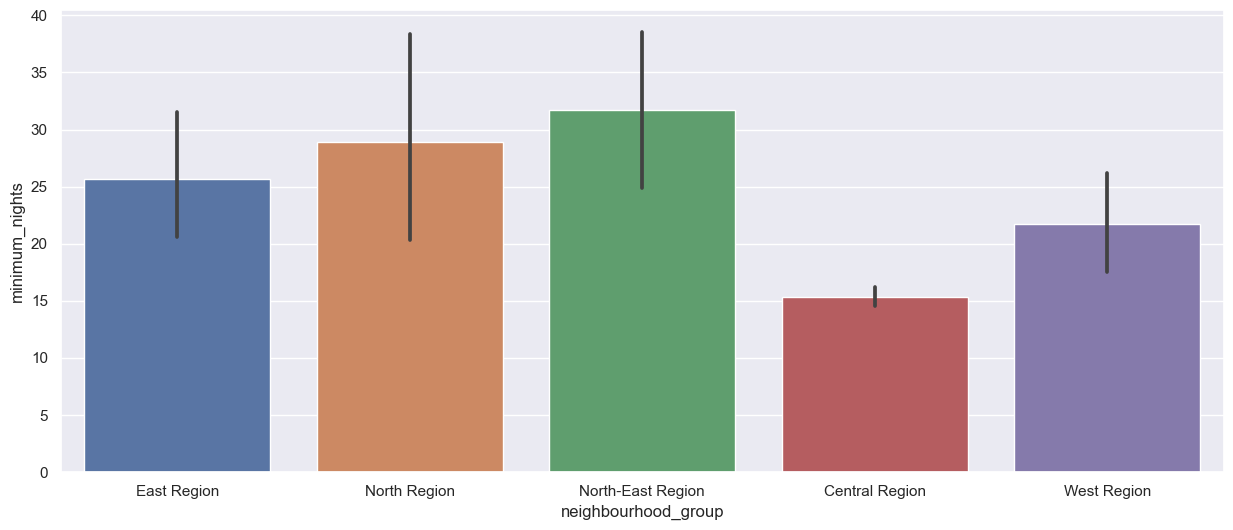

In [21]:
#neighbourhood_group - minimum_nights
plt.figure(figsize=(15,6))
result = data.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sb.barplot(x='neighbourhood_group', y="minimum_nights", data=data, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

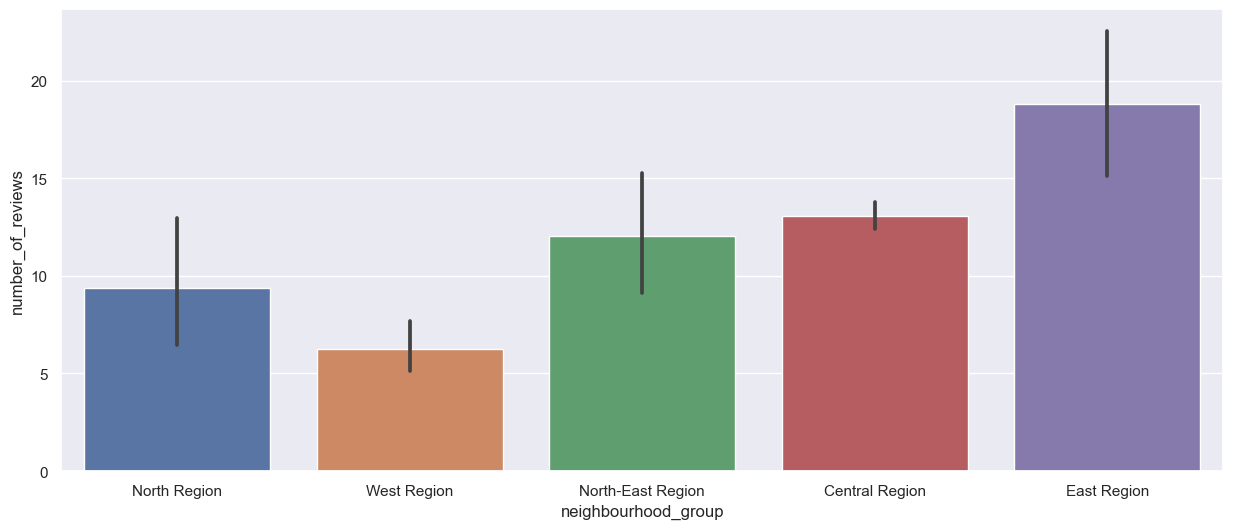

In [22]:
#neighbourhood_group - number_of_reviews
plt.figure(figsize=(15,6))
result = data.groupby(["neighbourhood_group"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sb.barplot(x='neighbourhood_group', y="number_of_reviews", data=data, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

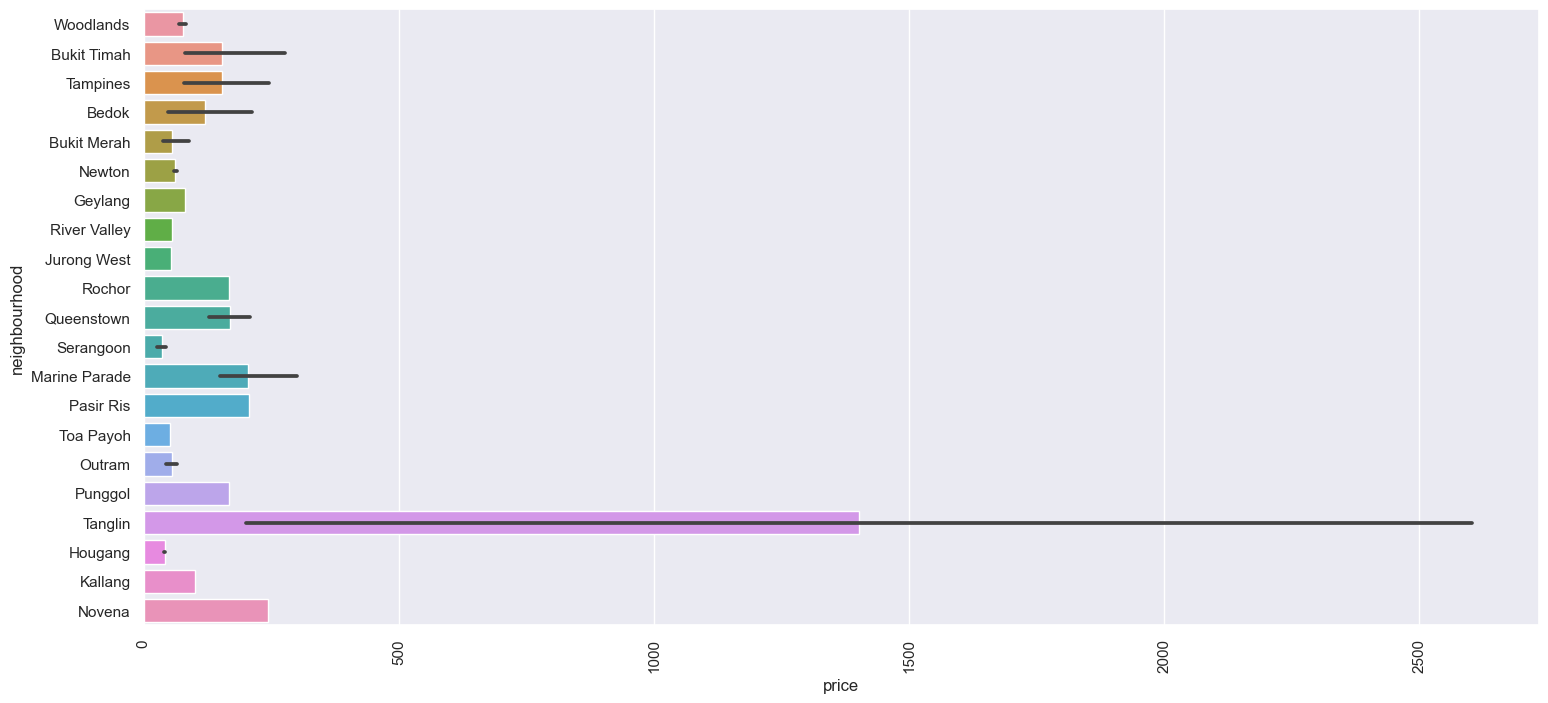

In [23]:
#neighbourhood - price
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')
sb.barplot(x=data.price[:50], y=data.neighbourhood[:50]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

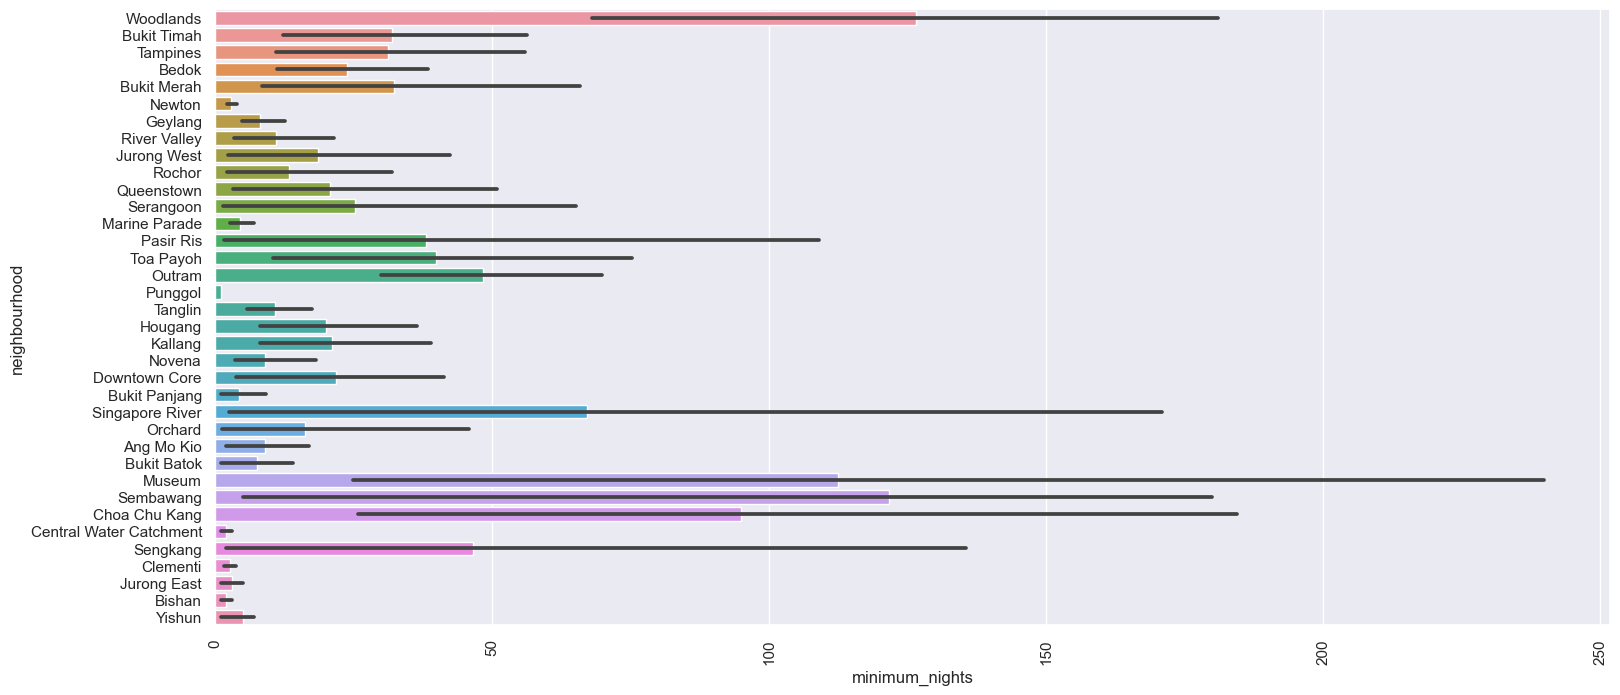

In [24]:
#neighbourhood - minimum_nights
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sb.barplot(x=data.minimum_nights[:500], y=data.neighbourhood[:500]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()